# Calgary Housing Project
Riley Waters<br>
DATA 512 - Human Centered Data Science<br>
University of Washington - Fall 2019

# Introduction

I was born and raised in Calgary Alberta, the [fastest growing urban area](http://worldpopulationreview.com/countries/canada-population/) in Canada since 2011 and the [first choice for “second mover” immigrants](https://moving2canada.com/living-in-calgary/) who relocate from their initial city. Calgary is not limited by natural land restrictions and is known for sprawling communities of single-family homes. However, there have been major efforts in recent years to densify the city with new rail lines and high-rise buildings. There have also been significant changes to demographics as new industries emerge and immigrant intake ramps up. I have observed many changes in recent trips home and will explore them from a human-centered data perspective In this project. We will learn about districts in Calgary: where new constructions are happening, what types of buildings they are, the people occupying them, and how this has changed from years prior. Few statistical analyses have been on this data so it may provide valuable knowledge for people interested in the city, whether they live there or plan to move there. 
 
I will perform this analysis with Human-Centered Data Science in mind in a form that is reproducible. I would also like to investigate potential privacy and ethical concerns in the way the data is formatted and released. Even after aggregation, releasing census data carries privacy risks. The goal of this investigation is to inform the city of potentially negative consequences in the way the data is released so that changes can be made. I will not attempt to reidentify individuals nor will I make public any privacy-risking findings.

# Background and Related Work

“[New Urbanism](https://www.cnu.org/resources/what-new-urbanism)” is a city planning approach that focusses on human-scaled urban design. It promotes walkable districts with dense housing and prioritizes mass transit over private cars. Many North American such as [Portland Oregon](https://oregonhistoryproject.org/narratives/commerce-climate-and-community-a-history-of-portland-and-its-people/portland-neighborhoods/renewing-the-public-space-and-the-new-urbanism/) have been expanding with this approach for decades, but the concept has only recently taken hold in Calgary. 

One research study found that “While land use practices respond slightly to shifting paradigms in community planning theory in rapidly growing communities, in slower-growth regions, conventional development strategies reflect political and economic priorities” (Grant 2003). This may lend credence to my hypothesis that during ‘bust’ cycles, Calgary relies more on conventional, car-based city planning.

A study on urban sprawl in Toronto found that “most households living in higher-density building types plan to eventually move to detached houses” and so if new urbanism were to substitute conventional development, “its projects will have to have a much larger proportion of single-family detached houses than Cornell’s (another research study) 37 percent.” (Skaburskis 2006). This informs my understanding of densification going into this analysis. High-density development does not necessarily replace suburban development, but I may expect new apartment buildings to appeal to young professionals who eventually move to lower-density communities.

The open data initiative in Calgary is quite new so there has not been much related work using the same data as me. I did find one independent data analyst, Willem Klumpenhouwer, who has used related data sets to [create interactive visualizations]( https://www.klumpentown.com/tfc/calgary) on transit times in Calgary. The 2019 census data was only launched in September, so I will keep an eye out for other work that may be done by independent analysts or news sources.

-	Grant, Jill. "Exploring the influence of new urbanism in community planning practice." Journal of architectural and planning research (2003): 234-253.
-	Skaburskis, Andrejs. "New urbanism and sprawl: A Toronto case study." Journal of Planning Education and Research 25.3 (2006): 233-248.

# Research Questions
In this notebook we will try to answer questions pertaining to the density of communities and the people living there.

-	_How do construction trends differ by community?_
-	_How has community density and population changed over time?_
-	_How do demographics differ by community?_

As this is a human-centered data analysis, we will also look into questions about the dataset itself:

-	_Could individual or family units data be compromised despite the aggregated nature of the data?_
-	_Could the inclusion of certain demographic data be used in unethical ways?_

# Data
Three data files are needed for this analysis. They are included in the project /data/ directory but may also be downloaded and placed there. Be aware that the City of Calgary Data Portal updates the datasets in-place so any updated datasets may break the notebook.

## Dataset 1 - Census by Community 2019
The Calgary Open Data portal released a [Census by Community 2019](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb) dataset. The version in this project was last updated on September 20, 2019. This set is an “official count of dwelling units and population within those units”. 
The dataset is licensed under the [Open Government License – City of Calgary](https://data.calgary.ca/stories/s/u45n-7awa) which allows for freedom to “copy, modify, publish, translate, adapt, distribute, or otherwise use the Information in any medium , mode, or format for any lawful purpose” granted that acknowledgement of the source is made. 
It has 306 rows, each representing a community district within the city. It has 142 columns. Below are some descriptions of columns that will be of interest.

| Column | Description  |  
|---|---|
| Class  | Zoning type eg. Industrial, residential, ect  |  
| SRG  | Yearly development capacity or housing supply  |  
| COMM_STRUCTURE  | Identification code of life-cycle patterns  |  
| RES_CNT  | Number of residents  |  
| DWELL_CNT  | Number of dwellings  |  
| {type}_CNT  | Dozens of columns counting person types  |  
| {type}_SCH | Which school system the dwellings support |
| {type}_OCCPD | The number of occupied units of each type of building |
| {type}_VACANT | The number of vacant units of each type of building |
| {type}_UC | The number of buildings of each type under construction |
| {type}_person | The number of persons occupying the units  of each type|
| {sex}_{age range} | Number of male, female, or other residents in each age range |


## Dataset 2 - Civic Census Results 1958-2019
To compare to previous years, we will use the [Civic Census Results 1958-2019](https://data.calgary.ca/Demographics/Civic-Census-Results-1958-2019/rmai-qvzh) dataset. The version in this project was last updated on September 20, 2019. This set is under the same license as the previous one and is also made available by the Calgary Open Data portal. It has 8 columns and 701 rows with information on “citywide and ward-level counts of dwelling units and residents over the past 60 years”. The columns of interest in this set are as follows:

| Column | Description  |  
|---|---|
| Year  | The year the data was collected  |
| Ward | The municipal ward | 
| Dwellings | Count of dwellings |
| Residents | Count of residents |
| Vehicles | Count of vehicles |
| Age 65+ | Count of residents 65 and older |
| Voters | Count of voters |  

## Dataset 3 - Community Boundaries Layer
The third and final data download is the [Community Boudaries Layer](https://data.calgary.ca/Base-Maps/Community-Boundaries/ab7m-fwn6). It is a GeoJSON file that we will use purely for mapping purposes. It is under the same license as the previous datasets as it is also hosted by Calgary Open Data Portal.

# Reproducibility
This analysis can be downloaded and run by anyone who may want to see how my results were obtained or explore further questions. A copy of the required data files are in the /data/ directory but you may also download them in the links provided in the data section.
To clone this repository, run `git clone https://github.com/rileywaters/data-512-project`

The following tools are required:
- [IPython Jupyter notebook](https://jupyter.org). A tool for executing Python Code. We use Python 3.7
- [pandas](https://pandas.pydata.org). A data analysis library. We use v0.25.3
- [folium](https://python-visualization.github.io/folium/). An interactive mapping library. We use v0.10.0
- [numpy](https://numpy.org). A scientific computing package. We use v1.18
- [matplotlib](https://matplotlib.org). A 2d plotting library. We use v3.1.1

In [1]:
import numpy as np
import pandas as pd
import folium
from matplotlib import pyplot as plt

# Data Setup

First, we read the two csv datasets into Pandas.

In [2]:
pd.set_option('mode.chained_assignment', None)

# Read in the 2019 dataset
census2019_df = pd.read_csv('./data/Census_by_Community_2019.csv')
census2019_df.head()

CLASS  CLASS_CODE COMM_CODE           NAME     SECTOR         SRG  \
0  Residential           1       LEG         LEGACY      SOUTH  DEVELOPING   
1  Residential           1       HPK  HIGHLAND PARK     CENTRE   BUILT-OUT   
2  Residential           1       CNS    CORNERSTONE  NORTHEAST  DEVELOPING   
3  Residential           1       MON     MONTGOMERY  NORTHWEST   BUILT-OUT   
4  Residential           1       TEM         TEMPLE  NORTHEAST   BUILT-OUT   

  COMM_STRUCTURE  CNSS_YR FOIP_IND  RES_CNT  \
0   BUILDING OUT     2019      NaN     6420   
1          1950s     2019      NaN     3838   
2          2000s     2019      NaN     2648   
3          1950s     2019      NaN     4515   
4    1960s/1970s     2019      NaN    10977   

                         ...                          OTHER_5_14  OTHER_15_19  \
0                        ...                                   0            0   
1                        ...                                   0            0   
2                        ...                                   0            0   
3                        ...                                   0            0   
4                        ...                                   0            0   

   OTHER_20_24  OTHER_25_34  OTHER_35_44  OTHER_45_54  OTHER_55_64  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   OTHER_65_74  OTHER_75                                       multipolygon  
0            0         0  MULTIPOLYGON (((-114.021996041091 50.863078904...  
1            0         0  MULTIPOLYGON (((-114.0691626854784 51.09565033...  
2            0         0  MULTIPOLYGON (((-113.91839732026011 51.1760690...  
3            0         0  MULTIPOLYGON (((-114.16457918083577 51.0814533...  
4            0         0  MULTIPOLYGON (((-113.93512706147847 51.0960756...  

[5 rows x 142 columns]

There are a lot of fields in this dataset but not much cleaning is required as everything seems to be in the proper format.

In [3]:
# Read in the historical dataset
historical_df = pd.read_csv('./data/Civic_Census_Results_1958-2019.csv')
historical_df.head()

Year  Ward  Dwellings  Residents  Vehicles  Age 65 +  \
0  04/01/1958 12:00:00 AM   NaN    64288.0     206831       NaN       NaN   
1  04/01/1959 12:00:00 AM   NaN        NaN     218418       NaN       NaN   
2  04/01/1960 12:00:00 AM   NaN    72987.0     235428       NaN       NaN   
3  04/01/1961 12:00:00 AM   1.0        NaN      38462   11455.0       NaN   
4  04/01/1961 12:00:00 AM   2.0        NaN      35935   10201.0       NaN   

     Voters  CENSUS_YEAR  
0       NaN         1958  
1  121813.0         1959  
2       NaN         1960  
3   21784.0         1961  
4   19782.0         1961

This dataset has a good amount of missing values in some important fields like dwellings. We will note this for later.

# Construction by community in 2019
To analyze which communities are building the most of each building type, we will look at the '{type}_UC' fields that indicate the number of buildings under construction for each type.

We will find the ratio of each type of dwelling to the total number of dwellings in each community. This will show the pre-existing relationship of dwelling types to total dwellings.

Then, we will create a map of the difference between high and low constructions to see where construction is happening.

I define high density as being apartment dwellings while low density is single-family homes, duplexes, multiplexes, and townhomes. We combine the occupied and vacant counts to get the total pre-existing counts.

In [4]:
# Filter to the columns of interest
buildings_df = census2019_df[['NAME', 'SECTOR', 'DWELL_CNT', 
                           'SF_OCCPD', 'SF_VACANT', 'SF_UC',
                           'MUL_OCCPD', 'MUL_VACANT', 'MUL_UC',
                           'DUP_OCCPD', 'DUP_VACANT', 'DUP_UC',
                           'TWN_OCCPD', 'TWN_VACANT', 'TWN_UC',
                           'APT_OCCPD', 'APT_VACANT', 'APT_UC']]

# Get the type ratios
buildings_df['low_ratio'] = buildings_df.eval('(SF_OCCPD+SF_VACANT+MUL_OCCPD+MUL_VACANT+DUP_OCCPD+DUP_VACANT+TWN_OCCPD+TWN_VACANT)/DWELL_CNT')
buildings_df['high_ratio'] = buildings_df.eval('(APT_OCCPD+APT_VACANT)/DWELL_CNT')

# Get the construction fields
buildings_df['low_uc'] = buildings_df.eval('(SF_UC+MUL_UC+DUP_UC+TWN_UC)')
buildings_df['high_uc'] = buildings_df.eval('APT_UC')
buildings_df['high_low_diff'] = buildings_df.eval('APT_UC-(SF_UC+MUL_UC+DUP_UC+TWN_UC)')

# Remove any inf caused by the ratios
buildings_df = buildings_df.replace([np.inf, -np.inf], np.nan)

# Look at the top high-density under-construction communities
buildings_df[['NAME', 'SECTOR', 'low_ratio', 'high_ratio', 'low_uc', 'high_uc', 'high_low_diff']].sort_values('high_uc', ascending=False).reset_index(drop=True).head(10)

NAME     SECTOR  low_ratio  high_ratio  low_uc  high_uc  \
0               MAHOGANY  SOUTHEAST   0.754604    0.143998     143      260   
1                  SETON  SOUTHEAST   0.180884    0.361768     153      256   
2      DOWNTOWN WEST END     CENTRE   0.000485    0.846191       0      250   
3  DOWNTOWN EAST VILLAGE     CENTRE   0.004076    0.845498       0      223   
4            CORNERSTONE  NORTHEAST   0.586770    0.000000     301      219   
5           WEST SPRINGS       WEST   0.870591    0.046162      96      216   
6          SKYVIEW RANCH  NORTHEAST   0.503473    0.431617      43      158   
7          SOUTH CALGARY     CENTRE   0.516745    0.364875      40      122   
8             MANCHESTER     CENTRE   0.039454    0.767830       4      109   
9               ALTADORE     CENTRE   0.729072    0.160122      72       98   

   high_low_diff  
0            117  
1            103  
2            250  
3            223  
4            -82  
5            120  
6            115  
7             82  
8            105  
9             26

The above dataframe shows the communities building the most high-density housing. Some of the communities previously had a small high-density ratio but are rapidly densifying. Cornerstone had a previous ratio of 0.00, indicating that it was recently re-zoned or is an entirely new community. Other communities near the city center had a previously high high-density ratio and are also building many more apartments.

Let's view the construction on an interactive map to see if there are any patterns in the densifying neighborhoods.

In [5]:
# Create a folium map centered on Calgary
m = folium.Map(
    location = [51.044281, -114.062544],
    tiles = 'cartodbpositron',
    zoom_start=10
)

# Add the community boundaries from the geojson and color the construction
buildings = folium.Choropleth(geo_data="data/Community Boundaries.geojson",
            data = buildings_df,
            columns = ['NAME', 'high_low_diff'],
            key_on= 'feature.properties.name',
            fill_color='RdBu',
            fill_opacity = 0.7,
            line_opacity = 0.2,
            legend_name = 'Difference between high and low density constructions').add_to(m)

# Add tooltips to see the community names
folium.features.GeoJsonTooltip(fields=['name','class','sector','comm_structure']).add_to(buildings.geojson)

display(m)

The red communities are ones that are building more low-density than high-density constructions. The opposite is true for blue communities. The city center is quite blue as expected from an area with no single-family zoning. It gets more interesting in the outlying communities. Many of the highly blue or red neighborhoods are 'Building Out', meaning that they are brand new communities. It seems like some of them are building many apartments even when far from the city center.

To gain more context into the preexisting structures, let's map out the low density ratio.

In [6]:
# Create a folium map centered on Calgary
m = folium.Map(
    location = [51.044281, -114.062544],
    tiles = 'cartodbpositron',
    zoom_start=10
)

# Add the community boundaries from the geojson and color the construction
buildings = folium.Choropleth(geo_data="data/Community Boundaries.geojson",
            data = buildings_df,
            columns = ['NAME', 'low_ratio'],
            key_on= 'feature.properties.name',
            fill_color='RdBu',
            fill_opacity = 0.7,
            line_opacity = 0.2,
            legend_name = 'Low-density ratio').add_to(m)

# Add tooltips to see the community names
folium.features.GeoJsonTooltip(fields=['name','class','sector','comm_structure']).add_to(buildings.geojson)

display(m)

Most non-industrial communities outside of the city center are low-density neighborhoods as expected. Again, the interesting finding here is that the new communities are tending to favor high-density structures despite being far away from the city core.

# Construction trends over time
My hypothesis is that construction in Calgary relates to boom and bust cycles in oil prices. Many Calgarians work in the natural resource industry so the growth of the city may be tied closely to it’s health. Let's look at the historical change in residents and dwellings over time.

We must group by the census year and sum the other fields, then plot the fields of interest.

In [7]:
# Aggregate the data by year
aggregated_df = historical_df.groupby(['CENSUS_YEAR']).sum()
aggregated_df = aggregated_df.replace(0, np.nan)
aggregated_df.head()

Ward  Dwellings  Residents  Vehicles  Age 65 +    Voters
CENSUS_YEAR                                                          
1958          NaN    64288.0     206831       NaN       NaN       NaN
1959          NaN        NaN     218418       NaN       NaN  121813.0
1960          NaN    72987.0     235428       NaN       NaN       NaN
1961         21.0        NaN     241673   66802.0       NaN  132233.0
1962         21.0    81610.0     269068       NaN       NaN       NaN

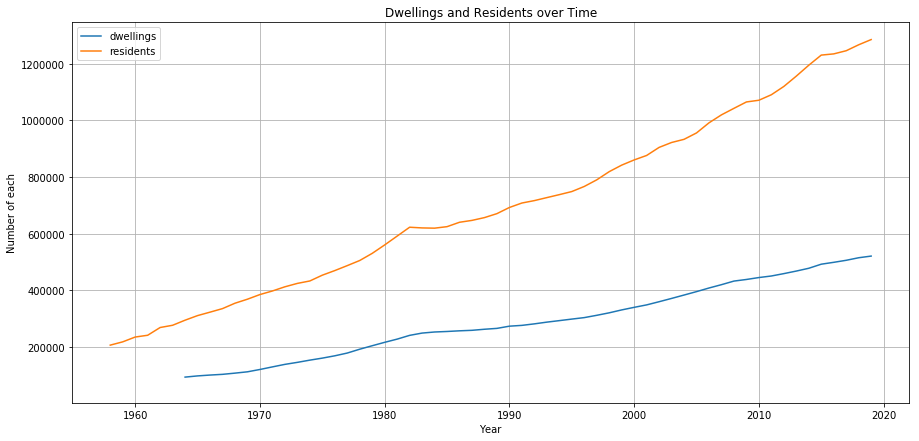

In [8]:
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

ax.plot(aggregated_df['Dwellings'], label = 'dwellings')
ax.plot(aggregated_df['Residents'], label = 'residents')

ax.title.set_text('Dwellings and Residents over Time')
ax.set_ylabel('Number of each')
ax.set_xlabel('Year')
ax.grid(True)
ax.legend(loc='upper left')
plt.show()


This graph looks quite linear, but the small anomalies are interesting. A look into the history of [Alberta's Boom and Bust](https://www.cbc.ca/history/EPISCONTENTSE1EP17CH3PA1LE.html) cycle paints a clear picture. There was an oil boom in the 70s that "made more multi-millionaires than anytime before in Canadian history", followed shortly after by a global recession in the early 80s. High world oil prices in the 90s spurred more growth. The flat period in 2018 could also be attributed to an oil price crash. Alberta's growth is still closely tied to oil prices despite recent efforts to diversify.

Let's look more closely into how the different communities have changed over time. We will group by the census year and the ward this time. The ward we are most interested in is the city center, Ward 8. A map of all wards can be found here: https://commons.wikimedia.org/wiki/File:Calgary_wards_2010.jpg

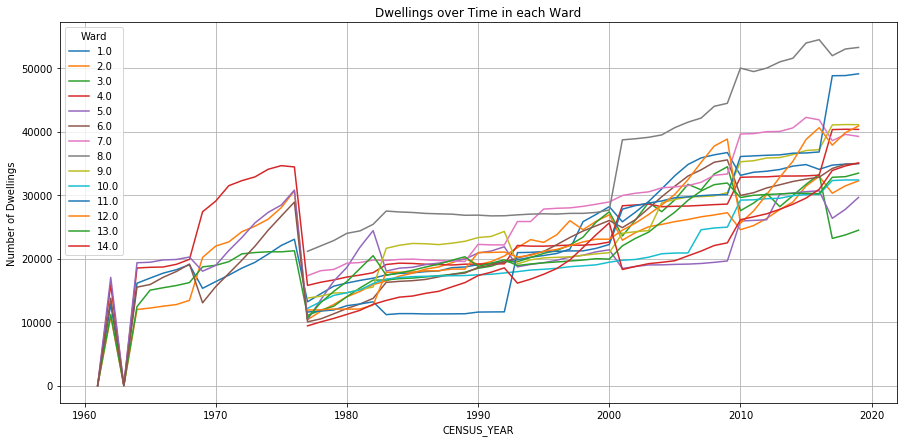

In [9]:
# plot data for dwellings
fig, ax = plt.subplots(figsize=(15,7))
historical_df.groupby(['CENSUS_YEAR','Ward']).sum()['Dwellings'].unstack().plot(ax=ax)
ax.set_ylabel('Number of Dwellings')
ax.grid(True)
ax.title.set_text('Dwellings over Time in each Ward')

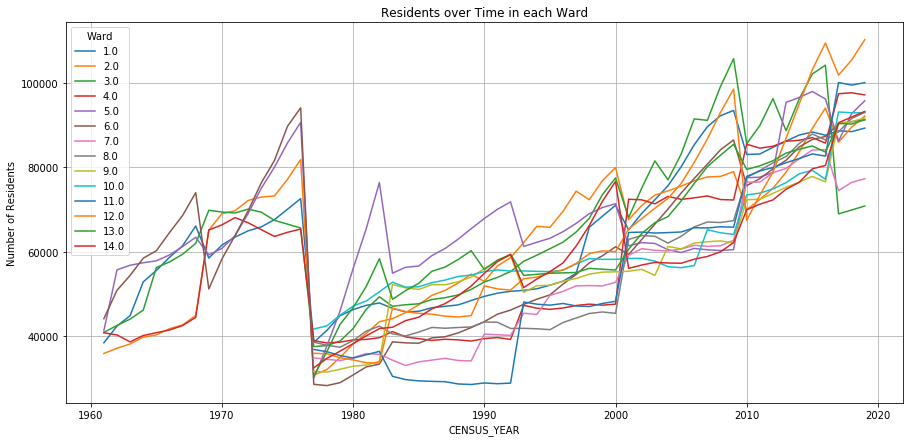

In [10]:
# plot data for residents
fig, ax = plt.subplots(figsize=(15,7))
historical_df.groupby(['CENSUS_YEAR','Ward']).sum()['Residents'].unstack().plot(ax=ax)
ax.set_ylabel('Number of Residents')
ax.grid(True)
ax.title.set_text('Residents over Time in each Ward')

The overall trend that we discovered earlier is more pronounced in these charts. Although they may look messy, it is easy to spot outliers. In the year 2000, there was a massive jump in dwellings in the city center (Ward 8) with no corresponding jump in residents. Perhaps this is when the city began its urban renewal process. A data issue shows a spike and drop in dwellings in the 60s. This makes me uncertain of data recording practices for earlier years. A major drop in the late 70s is shown which may be due to a change in data recording procedures as it happens before the spike/drop from the economic recession in the 80s. 

# Demographics across communities
The dataset has many fields involving employment, voter counts, pets, and more. Unfortunately, I discovered that many of them are all 0 as they were fields added recently that the census did not previously track. However, there is still a good amount of age data in the dataset which I decided to look at. I'm interested in seeing if there are significant differences in age demographics among the city sectors.

We will define 6 different age sectors. Children are 0-14, Youth are 15-24, Early Adults are 25-44, Late Adults are 45-64, and Seniors are 65-75+.

In [11]:
# Filter to the columns of interest
demo_df = census2019_df[['SECTOR', 'CLASS', 'RES_CNT', 
                           'MF_0_4', 'MF_5_14', 'MF_20_24', 'MF_15_19', 'MF_20_24',
                           'MF_25_34', 'MF_35_44', 'MF_45_54', 'MF_55_64',
                           'MF_65_74', 'MF_75']]

# Get the type ratios
demo_df['children'] = demo_df.eval('(MF_0_4+MF_5_14)')
demo_df['youth'] = demo_df.eval('(MF_15_19+MF_20_24)')
demo_df['early_adults'] = demo_df.eval('(MF_25_34+MF_35_44)')
demo_df['late_adults'] = demo_df.eval('(MF_45_54+MF_55_64)')
demo_df['seniors'] = demo_df.eval('(MF_65_74+MF_75)')

demo_df = demo_df[['SECTOR','children','youth','early_adults','late_adults','seniors']]
demo_df = demo_df.groupby(['SECTOR']).mean()
demo_df

children       youth  early_adults  late_adults     seniors
SECTOR                                                                   
CENTRE      391.500000  297.387097   1460.500000   738.790323  362.000000
EAST        458.652174  276.521739    794.521739   691.608696  295.782609
NORTH      1170.800000  617.400000   1774.700000  1367.033333  541.133333
NORTHEAST   894.844444  525.311111   1405.933333   946.755556  410.266667
NORTHWEST  1000.400000  776.533333   1566.700000  1597.133333  866.166667
SOUTH       709.254237  420.762712   1108.576271  1072.050847  581.118644
SOUTHEAST  1345.291667  564.166667   2073.208333  1368.291667  472.958333
WEST        748.515152  447.909091   1016.333333  1060.393939  519.060606

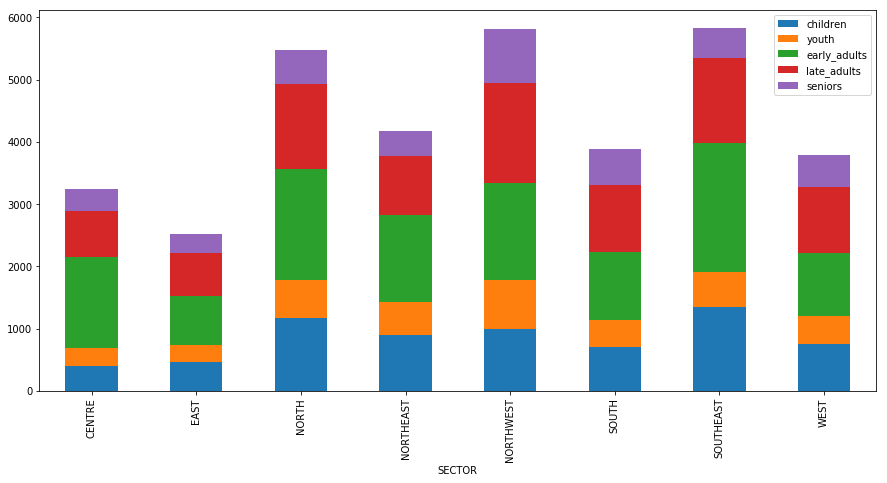

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
demo_df.plot(y=["children", "youth", "early_adults","late_adults", "seniors"], kind="bar", stacked='true', ax=ax)
plt.show()

This chart is as expected. More children and youth live in outlying communities while adults are relatively spread out. Unlike many cities, Calgary's core does not dominate business activity as businesses are fairly well-dispersed throughout the city. 

# A look at Data Privacy
As mentioned, many of the fields I was interested in investigating turned out to be unfilled as they were added in preparation for the next census. However, the next dataset will contain counts of all kinds of people: Voters, preschool children, employed/unemployed people, homeowners, and even information on pets. The data is aggregated to a houshold level following a community level. We have seen that this alone is not always enough to prevent re-identification, but given the current information in the dataset I would say that the benefits of releasing the data to the public outweight the risks. With more fields, analysts may be able to better identify key areas for growth in the city. 

# Findings, Implicaitions, and Limitations

Open data is a new concept for the City of Calgary and I believe they have done a good job. The [census process](https://www.calgary.ca/CA/city-clerks/Pages/Election-and-Information-Services/Civic-Census/General-Information.aspx) and meanings of each field were made clear. The data required little cleaning and everything was formatted correctly.  I did find some mistakes in the historical data where unnatural formations and missing data occurred for some years before 1970. The census process has changed over the decades which has likely made for inconsistent results. It would be nice if the city made notes of these changes.

There currently is little cause for privacy concerns as there isn’t much sensitive data. Most of the columns deal with building counts with some resident counts separated by age and male/female/other (it is unclear whether these fields indicate self-reported gender or biological sex). These are all aggregated by dwelling and again by community. However, there are many empty fields that have been recently added, suggesting that the next census will include details like employment, homeownership, and many more. I still believe that the aggregation will sufficiently protect identities in this case, but if further fields such as income or race are eventually added I would suggest taking a differential privacy approach to releasing the data. Some of the communities are quite small which may reduce privacy.

In my analysis, I found some interesting trends in construction. Mapping the high density and low-density constructions yielded some interesting results that reflected my own observations of the city. Many new communities are opting to construct high-density housing despite being far from the city core. This suggests that they are following the aforementioned ‘new-urbanism’ approach in creating walkable, dense communities.  The population of Calgary is quite young and lots of young professionals choose to live in smaller spaces for cost and low maintenance. 

The trends over time proved more interesting that I had predicted. There are very clear outliers in the wards regarding population and construction growth that reflect changes in the cities approach to growth and external influences. Major population changes can be seen around oil boom and bust cycles. The dwellings in the city core reflect urban revitalization projects that the city took on as it began to sprawl heavily in the turn of the century.

I focused on age in the demographics I had access to. The different areas of the city all had relatively similar ratios of age groups. This didn’t surprise me much because Calgary’s sectors each have their own business cores. I would have liked to look at other demographics such as education and income but they are not yet available.

# Reflection
Many Human-Centered Data Science principals were considered throughout this project. In choosing the data, I only considered datasets that specified freedom to copy, modify, publish, adapt, redistribute, and analyze.  I wanted to analyze a city because they reflected larger patterns in human behavior. The tool choices and documentation were done with reproducibility in mind such that others may see how my results were obtained and can iterate on it if need be. In looking at the data, I thought about the possible privacy implications of the data and bias in how it was collected. I chose to rely on inferential analysis because I decided that machine learning would be inappropriate for the data size and context.

There are many great possibilities unlocked by making city census data public, and many ethical concerns. Any further analyses to dive deeper into this work should keep Human-Centered principals in mind.